In [1]:
import numpy as np
import matplotlib.pyplot as plt  

In [2]:
# 载入数据
data = np.genfromtxt("kmeans.txt", delimiter=" ")

# 训练模型

In [3]:
# 计算距离 
def euclDistance(vector1, vector2):  
    return np.sqrt(sum((vector2 - vector1)**2))
  
# 初始化质心
def initCentroids(data, k):  
    numSamples, dim = data.shape
    # k个质心，列数跟样本的列数一样
    centroids = np.zeros((k, dim))  
    # 随机选出k个质心
    for i in range(k):  
        # 随机选取一个样本的索引
        index = int(np.random.uniform(0, numSamples))  
        # 作为初始化的质心
        centroids[i, :] = data[index, :]  
    return centroids  
  
# 传入数据集和k的值
def kmeans(data, k):  
    # 计算样本个数
    numSamples = data.shape[0]   
    # 样本的属性，第一列保存该样本属于哪个簇，第二列保存该样本跟它所属簇的误差
    clusterData = np.array(np.zeros((numSamples, 2)))  
    # 决定质心是否要改变的变量
    clusterChanged = True  
  
    # 初始化质心  
    centroids = initCentroids(data, k)  
  
    while clusterChanged:  
        clusterChanged = False  
        # 循环每一个样本 
        for i in range(numSamples):  
            # 最小距离
            minDist  = 100000.0  
            # 定义样本所属的簇
            minIndex = 0  
            # 循环计算每一个质心与该样本的距离
            for j in range(k):  
                # 循环每一个质心和样本，计算距离
                distance = euclDistance(centroids[j, :], data[i, :])  
                # 如果计算的距离小于最小距离，则更新最小距离
                if distance < minDist:  
                    minDist  = distance  
                    # 更新样本所属的簇
                    minIndex = j  
                    # 更新最小距离
                    clusterData[i, 1] = distance
              
            # 如果样本的所属的簇发生了变化
            if clusterData[i, 0] != minIndex:  
                # 质心要重新计算
                clusterChanged = True
                # 更新样本的簇
                clusterData[i, 0] = minIndex
  
        # 更新质心
        for j in range(k):  
            # 获取第j个簇所有的样本所在的索引
            cluster_index = np.nonzero(clusterData[:, 0] == j)
            # 第j个簇所有的样本点
            pointsInCluster = data[cluster_index]  
            # 计算质心
            centroids[j, :] = np.mean(pointsInCluster, axis = 0) 
#         showCluster(data, k, centroids, clusterData)
  
    return centroids, clusterData  
  
# 显示结果 
def showCluster(data, k, centroids, clusterData):  
    numSamples, dim = data.shape  
    if dim != 2:  
        print("dimension of your data is not 2!")  
        return 1  
  
    # 用不同颜色形状来表示各个类别
    mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']  
    if k > len(mark):  
        print("Your k is too large!")  
        return 1  
  
    # 画样本点  
    for i in range(numSamples):  
        markIndex = int(clusterData[i, 0])  
        plt.plot(data[i, 0], data[i, 1], mark[markIndex])  
  
    # 用不同颜色形状来表示各个类别
    mark = ['*r', '*b', '*g', '*k', '^b', '+b', 'sb', 'db', '<b', 'pb']  
    # 画质心点 
    for i in range(k):  
        plt.plot(centroids[i, 0], centroids[i, 1], mark[i], markersize = 20)  
  
    plt.show()

In [4]:
list_lost = []
for k in range(2,10):
    min_loss = 10000
    min_loss_centroids = np.array([])
    min_loss_clusterData = np.array([])
    for i in range(50):
        # centroids 簇的中心点 
        # cluster Data样本的属性，第一列保存该样本属于哪个簇，第二列保存该样本跟它所属簇的误差
        centroids, clusterData = kmeans(data, k)  
        loss = sum(clusterData[:,1])/data.shape[0]
        if loss < min_loss:
            min_loss = loss
            min_loss_centroids = centroids
            min_loss_clusterData = clusterData
    list_lost.append(min_loss)
    
#     print('loss',min_loss)
# print('cluster complete!')      
# centroids = min_loss_centroids
# clusterData = min_loss_clusterData

# 显示结果
# showCluster(data, k, centroids, clusterData)

D:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
D:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [5]:
list_lost

[2.9811811738953176,
 1.9708559728104191,
 1.1675654672086735,
 1.0712368269135584,
 1.0076791550071307,
 0.9428650283943718,
 0.8835789709731454,
 0.8398134607706919]

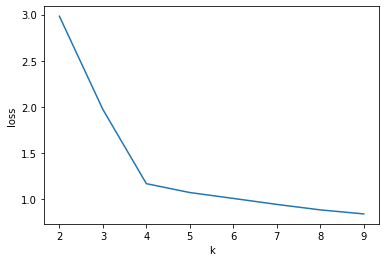

In [6]:
plt.plot(range(2,10),list_lost)
plt.xlabel('k')
plt.ylabel('loss')
plt.show()

# 做预测

In [7]:
# 做预测
x_test = [0,1]
np.tile(x_test,(k,1))

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1]])

In [8]:
# 误差
np.tile(x_test,(k,1))-centroids

array([[-4.589752  ,  2.575316  ],
       [-3.491824  , -2.19757475],
       [ 3.17006745, -1.60393509],
       [-2.19454347,  4.07604306],
       [-1.97752811, -2.36764011],
       [ 1.595569  , -2.01158056],
       [ 3.53973889,  3.89384326],
       [-2.8405775 , -4.163084  ],
       [-3.0168788 , -0.749675  ]])

In [9]:
# 误差平方
(np.tile(x_test,(k,1))-centroids)**2

array([[21.06582342,  6.6322525 ],
       [12.19283485,  4.82933478],
       [10.04932767,  2.57260778],
       [ 4.81602104, 16.61412702],
       [ 3.91061743,  5.6057197 ],
       [ 2.54584043,  4.04645633],
       [12.52975144, 15.16201536],
       [ 8.06888053, 17.33126839],
       [ 9.10155769,  0.56201261]])

In [10]:
# 误差平方和
((np.tile(x_test,(k,1))-centroids)**2).sum(axis=1)

array([27.69807592, 17.02216963, 12.62193544, 21.43014806,  9.51633713,
        6.59229677, 27.6917668 , 25.40014892,  9.6635703 ])

In [11]:
# 最小值所在的索引号
np.argmin(((np.tile(x_test,(k,1))-centroids)**2).sum(axis=1))

5

In [12]:
def predict(datas):
    return np.array([np.argmin(((np.tile(data,(k,1))-centroids)**2).sum(axis=1)) for data in datas])

# 画出簇的作用区域

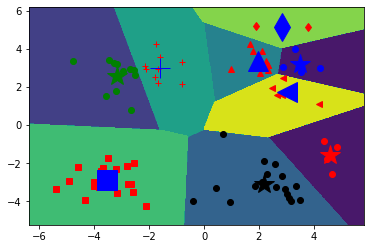

In [13]:
# 获取数据值所在的范围
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

# 生成网格矩阵
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

z = predict(np.c_[xx.ravel(), yy.ravel()])# ravel与flatten类似，多维数据转一维。flatten不会改变原始数据，ravel会改变原始数据
z = z.reshape(xx.shape)
# 等高线图
cs = plt.contourf(xx, yy, z)
# 显示结果
showCluster(data, k, centroids, clusterData)  